In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import scipy.optimize

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
def load_latex_config():
    pix_to_pt = 72/100
    plt.rcParams['errorbar.capsize'] = 1
    plt.rcParams['lines.linewidth'] = 2.0 * pix_to_pt
    plt.rcParams['lines.markeredgewidth'] = 2.0 * pix_to_pt
    plt.rcParams['savefig.bbox'] = 'tight'
    plt.rcParams['axes.labelsize'] = 21
    plt.rcParams['axes.labelpad'] = 15
    plt.rcParams['axes.linewidth'] = 1.0 * pix_to_pt
    plt.rcParams['axes.titlesize'] = 11
    plt.rcParams['lines.markersize'] = 2
    plt.rcParams['xtick.labelsize'] = 21
    plt.rcParams['ytick.labelsize'] = 21
    plt.rcParams['xtick.major.width'] = 0.5 * pix_to_pt
    plt.rcParams['xtick.minor.width'] = 0.5 * pix_to_pt
    plt.rcParams['ytick.major.width'] = 0.5 * pix_to_pt
    plt.rcParams['ytick.minor.width'] = 0.5 * pix_to_pt
    plt.rcParams['text.usetex'] = True
    plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb}'
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Computer Modern Roman']
    plt.rcParams['font.size'] = 18
    plt.rcParams['legend.fancybox'] = False
    plt.rcParams['legend.shadow'] = False
    plt.rcParams['legend.framealpha'] = '0.8'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['legend.edgecolor'] = '0.5'
    plt.rcParams['patch.linewidth'] = 0.5 * pix_to_pt
    plt.rcParams['legend.handlelength'] = 1.0
    plt.rcParams['legend.fontsize'] = 21
    plt.rcParams['figure.figsize'] = (8, 6)
load_latex_config()

In [3]:
files = {
    1: "fit_spectrum_fit_spectrum_-rebin-Nbin1-SP-5tN-9t0-18tD_J-samplings_estimates.csv",
    2: "fit_spectrum_fit_spectrum_-rebin-Nbin2-SP-5tN-9t0-18tD_J-samplings_estimates.csv",
    3: "fit_spectrum_fit_spectrum_-rebin-Nbin3-SP-5tN-9t0-18tD_J-samplings_estimates.csv",
    4: "fit_spectrum_fit_spectrum_-rebin-Nbin4-SP-5tN-9t0-18tD_J-samplings_estimates.csv",
    5: "fit_spectrum_fit_spectrum_-rebin-Nbin5-SP-5tN-9t0-18tD_J-samplings_estimates.csv",
    10: "fit_spectrum_fit_spectrum_-rebin-Nbin10-SP-5tN-9t0-18tD_J-samplings_estimates.csv",
}

In [4]:
particles = {
    r"$\pi$": {"isospin": "triplet", "strangeness": 0, "irrep":"A1um", "momentum":0, 'rotate level':0 },
    "$K$": {"isospin": "doublet", "strangeness": 1, "irrep":"A1u", "momentum":0, 'rotate level':0 },
    r"$\pi\pi$ $A_1^+(8)$ ROT 0": {"isospin": "quintet", "strangeness": 0, "irrep":"A1p", "momentum":8, 'rotate level':0 },
    "$KK$ $E(9)$ ROT 0": {"isospin": "triplet", "strangeness": 2, "irrep":"E", "momentum":9, 'rotate level':0 },
}
data = {particle: {file: {} for file in files} for particle in particles}

In [5]:

for file in files:
    df = pd.read_csv(files[file])
    for particle in particles:
        df1 = df.copy()
        for quantum_number in particles[particle]:
            df1 = df1[df1[quantum_number]==particles[particle][quantum_number]]
            
        row = df1.iloc[0]
        data[particle][file]['ecm value'] = row['ecm value']
        data[particle][file]['ecm error'] = row['ecm error']
        data[particle][file]['chisqrdof'] = row['chisqrdof']
        
print(data)


{'$\\pi$': {1: {'ecm value': 0.0421740243236411, 'ecm error': 0.0001954202530602, 'chisqrdof': 2.21816452767}, 2: {'ecm value': 0.0422322284364177, 'ecm error': 0.0001996997033769, 'chisqrdof': 2.12874493244}, 3: {'ecm value': 0.0421571904954517, 'ecm error': 0.0001983859541231, 'chisqrdof': 2.2694310777}, 4: {'ecm value': 0.0422348507686622, 'ecm error': 0.0002100504128042, 'chisqrdof': 2.38967808275}, 5: {'ecm value': 0.0422274853591479, 'ecm error': 0.000212789530092, 'chisqrdof': 2.64727158875}, 10: {'ecm value': 0.0417325361646032, 'ecm error': 0.0001992731049426, 'chisqrdof': 3.71324029153}}, '$K$': {1: {'ecm value': 0.1591696545900406, 'ecm error': 9.33463850124047e-05, 'chisqrdof': 0.653020727392}, 2: {'ecm value': 0.1591704221653846, 'ecm error': 9.19147260206874e-05, 'chisqrdof': 0.664728197459}, 3: {'ecm value': 0.159168742457582, 'ecm error': 9.219267413989048e-05, 'chisqrdof': 0.625268467266}, 4: {'ecm value': 0.1591582140689668, 'ecm error': 9.61840741453697e-05, 'chisqrd

In [6]:
i=0
for particle in data:
    rebin_values = data[particle].keys()
    rel_err = [data[particle][key]['ecm error']/data[particle][1]['ecm error'] for key in data[particle]]
    plt.plot(rebin_values, rel_err, label=particle,color=settings.colors[i], marker=settings.markers[i])
    i+=1

# for file in files
#     i+=1
plt.xlabel(r"$N_{\textup{bin}}$")
plt.xticks(ticks=list(rebin_values))
plt.ylabel(r"$\sigma_{N_{\textup{bin}}}/\sigma_{N_1}$")
plt.legend()
plt.tight_layout()
plt.savefig("rebin_analysis_3meson.pdf")
plt.clf()

<Figure size 800x600 with 0 Axes>

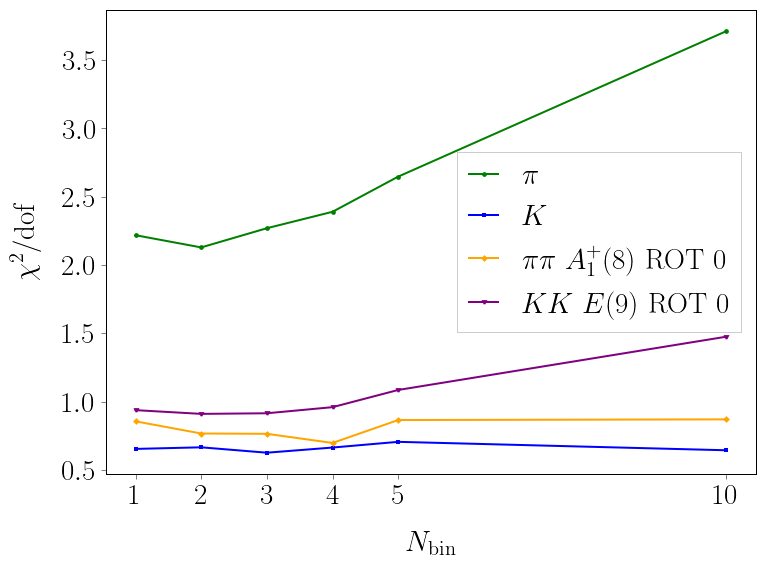

In [7]:
i=0
for particle in data:
    rebin_values = data[particle].keys()
    rel_err = [data[particle][key]['chisqrdof'] for key in data[particle]]
    plt.plot(rebin_values, rel_err, label=particle,color=settings.colors[i], marker=settings.markers[i])
    i+=1

# for file in files
#     i+=1
plt.xlabel(r"$N_{\textup{bin}}$")
plt.xticks(ticks=list(rebin_values))
plt.ylabel(r"$\chi^2$/dof")
plt.legend()
plt.tight_layout()
plt.savefig("rebin_analysis_3meson-chi.pdf")